In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Data Collection, Analysis and Processing

Flower dataset from google website is used. Download the zip file using cache_dir in the current file using '.'

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [8]:
data_dir

'./datasets/flower_photos'

In [9]:
import pathlib

data_path = pathlib.Path(data_dir)
data_path

PosixPath('datasets/flower_photos')

In [10]:
# get all the files with jpg extension i.e get all the images
image_count = len(list(data_path.glob('*/*.jpg')))
# glob: a function that's used to search for files that match a specific file pattern or name
image_count

3670

In [11]:
roses = list(data_path.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/2265390547_2409007cef_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4881402397_1c664af2f7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3556123230_936bf084a5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4735314389_94fe1b2a9f_n.jpg')]

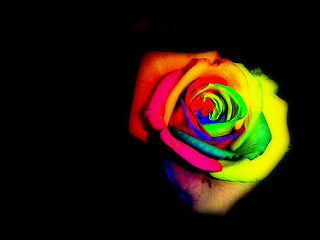

In [12]:
# View the image
PIL.Image.open(str(roses[1]))

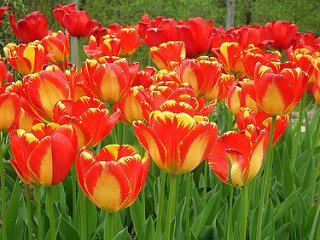

In [13]:
# View tulips image
tulips = list(data_path.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [14]:
# Create a dictonary for all the type of flower's path

flower_dict = {
    'roses': list(data_path.glob('roses/*')),
    'daisy': list(data_path.glob('daisy/*')),
    'dandelion': list(data_path.glob('dandelion/*')),
    'sunflowers': list(data_path.glob('sunflowers/*')),
    'tulips': list(data_path.glob('tulips/*')),
}

In [15]:
flower_dict_labels = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [16]:
# Using cv2 to read the image file
img = cv2.imread(str(flower_dict['roses'][0]))
img.shape

(228, 320, 3)

In [17]:
# Build the X and Y
X, Y = [], []

for flower_name, images in flower_dict.items():
  print(flower_name)
  print(len(images))
  # resize all the image to same dimenions
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    Y.append(flower_dict_labels[flower_name])

print(X[0])
print(Y[0])

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799
[[[147 183 220]
  [148 183 223]
  [148 182 225]
  ...
  [148 183 217]
  [147 181 217]
  [146 179 218]]

 [[146 183 220]
  [147 182 223]
  [150 185 228]
  ...
  [148 182 218]
  [146 180 217]
  [149 182 222]]

 [[146 182 220]
  [149 183 224]
  [152 186 229]
  ...
  [147 181 219]
  [149 182 221]
  [158 188 229]]

 ...

 [[110 158 189]
  [111 156 189]
  [112 157 190]
  ...
  [126 167 200]
  [131 168 202]
  [126 167 200]]

 [[111 157 190]
  [112 157 190]
  [115 158 191]
  ...
  [126 167 200]
  [131 168 202]
  [126 167 200]]

 [[111 157 190]
  [112 157 190]
  [117 160 193]
  ...
  [126 166 201]
  [131 168 203]
  [126 166 201]]]
0


In [18]:
# COnvert X and Y to numpy array

X = np.array(X)
Y = np.array(Y)

## Model Building

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
# Scale the values of X_train and X_test

X_train_scaled = X_train /255
X_test_scaled = X_test / 255

In [21]:
X_train_scaled[0]

array([[[0.16862745, 0.61960784, 0.45882353],
        [0.16078431, 0.62745098, 0.42352941],
        [0.09803922, 0.59215686, 0.3372549 ],
        ...,
        [0.22352941, 0.25882353, 0.25882353],
        [0.23921569, 0.26666667, 0.26666667],
        [0.24313725, 0.2745098 , 0.28235294]],

       [[0.16078431, 0.60392157, 0.45490196],
        [0.17647059, 0.63921569, 0.44313725],
        [0.1254902 , 0.61568627, 0.37254902],
        ...,
        [0.21568627, 0.29803922, 0.27843137],
        [0.22745098, 0.30980392, 0.28235294],
        [0.22745098, 0.31372549, 0.29019608]],

       [[0.14509804, 0.58431373, 0.43529412],
        [0.18039216, 0.63529412, 0.44705882],
        [0.15294118, 0.62745098, 0.39607843],
        ...,
        [0.18039216, 0.37647059, 0.30196078],
        [0.18039216, 0.39215686, 0.30980392],
        [0.18039216, 0.4       , 0.30980392]],

       ...,

       [[0.11372549, 0.43921569, 0.23529412],
        [0.14509804, 0.40784314, 0.27843137],
        [0.18039216, 0

In [31]:
from keras.src.engine.training import optimizer
# Build the CNN
total_classes = 5

cnn_model = Sequential([
    # COnvoultion and pooling
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    # Dense Layer
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(total_classes)
])

# Compile the model
cnn_model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
# Explanation for 'from_logits=True' -->  https://stackoverflow.com/a/71365020/1661267

# Train the model
cnn_model.fit(X_train_scaled, Y_train, epochs = 30)


Epoch 1/30
92/92 [==============================] - 85s 900ms/step - loss: 1.3272 - accuracy: 0.4479
Epoch 2/30
92/92 [==============================] - 86s 934ms/step - loss: 0.9819 - accuracy: 0.6155
Epoch 3/30
92/92 [==============================] - 84s 910ms/step - loss: 0.8461 - accuracy: 0.6744
Epoch 4/30
92/92 [==============================] - 82s 887ms/step - loss: 0.6390 - accuracy: 0.7609
Epoch 5/30
92/92 [==============================] - 84s 918ms/step - loss: 0.4317 - accuracy: 0.8495
Epoch 6/30
92/92 [==============================] - 85s 921ms/step - loss: 0.2648 - accuracy: 0.9080
Epoch 7/30
92/92 [==============================] - 85s 918ms/step - loss: 0.1605 - accuracy: 0.9516
Epoch 8/30
92/92 [==============================] - 91s 994ms/step - loss: 0.1057 - accuracy: 0.9680
Epoch 9/30
92/92 [==============================] - 85s 925ms/step - loss: 0.1030 - accuracy: 0.9700
Epoch 10/30
92/92 [==============================] - 82s 893ms/step - loss: 0.0512 - accura

In [32]:
cnn_model.evaluate(X_test_scaled, Y_test)

23/23 [==============================] - 6s 233ms/step - loss: 2.4449 - accuracy: 0.6621


[2.4449267387390137, 0.6621253490447998]

Model is overfitted as Training accuracy is 99% and test accuracy is 66%

In [33]:
# Prediction
pred = cnn_model.predict(X_test_scaled)
pred

23/23 [==============================] - 7s 282ms/step


array([[ -2.526984  ,   2.9606209 ,   5.6020546 , -10.5726595 ,
         -2.6837738 ],
       [  3.2508    ,  12.967519  ,  -1.6384039 , -13.893506  ,
        -12.035827  ],
       [ -7.166289  ,   6.787233  ,   9.361192  ,  -5.960001  ,
         -9.587294  ],
       ...,
       [ -2.2529452 ,   1.9010031 ,   1.2060523 ,  -3.998577  ,
          5.2480507 ],
       [ -3.1326747 ,  -2.8673232 ,   6.8373256 ,  -5.1383915 ,
         -1.2159513 ],
       [ -5.3361273 ,  -4.3467994 ,  12.707777  ,   0.27465248,
          0.17973033]], dtype=float32)

In [34]:
# Probability score for the Prediction
prob_score = tf.nn.softmax(pred[0])
prob_score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.7509779e-04, 6.6485010e-02, 9.3300468e-01, 8.8164789e-08,
       2.3517665e-04], dtype=float32)>

In [36]:
np.argmax(prob_score)

2

In [38]:
Y_test[0]

1

## Model Buildin using Data Augmentation

In [27]:
from keras.preprocessing import image

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (180,
                                                                              180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

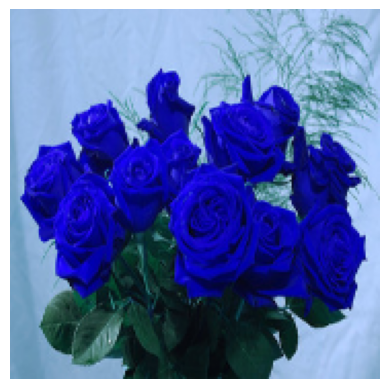

In [19]:
plt.axis('off')
plt.imshow(X[0])

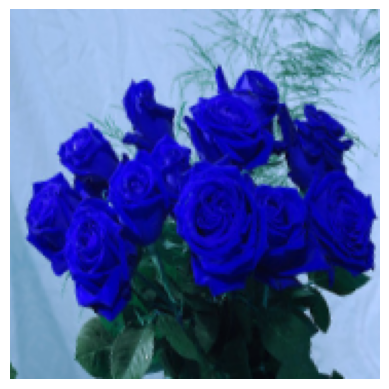

In [20]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [28]:
# Build the CNN with data Augmentation and Dropout Layer
total_classes = 5

cnn_model_augment = Sequential([
    # Applying data augmentation
    data_augmentation,

    # COnvoultion and pooling
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    # Dropout layer
    layers.Dropout(0.2),

    # Dense Layer
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(total_classes)
])

# Compile the model
cnn_model_augment.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)
# Explanation for 'from_logits=True' -->  https://stackoverflow.com/a/71365020/1661267

# Train the model
cnn_model_augment.fit(X_train_scaled, Y_train, epochs = 30)


Epoch 1/30
92/92 [==============================] - 103s 1s/step - loss: 1.4468 - accuracy: 0.3661
Epoch 2/30
92/92 [==============================] - 101s 1s/step - loss: 1.0954 - accuracy: 0.5511
Epoch 3/30
92/92 [==============================] - 101s 1s/step - loss: 1.0086 - accuracy: 0.5909
Epoch 4/30
92/92 [==============================] - 101s 1s/step - loss: 0.9075 - accuracy: 0.6437
Epoch 5/30
92/92 [==============================] - 101s 1s/step - loss: 0.8606 - accuracy: 0.6604
Epoch 6/30
92/92 [==============================] - 106s 1s/step - loss: 0.7961 - accuracy: 0.6863
Epoch 7/30
92/92 [==============================] - 99s 1s/step - loss: 0.7617 - accuracy: 0.7003
Epoch 8/30
92/92 [==============================] - 99s 1s/step - loss: 0.7385 - accuracy: 0.7057
Epoch 9/30
92/92 [==============================] - 99s 1s/step - loss: 0.6981 - accuracy: 0.7313
Epoch 10/30
92/92 [==============================] - 99s 1s/step - loss: 0.6611 - accuracy: 0.7394
Epoch 11/30
9

In [29]:
# evaluate test data
cnn_model_augment.evaluate(X_test_scaled, Y_test)

23/23 [==============================] - 6s 232ms/step - loss: 0.8377 - accuracy: 0.7657


[0.8376737833023071, 0.7656675577163696]

In [31]:
# Checking the prediction
pred_aug = cnn_model_augment.predict(X_test_scaled)
pred_aug

23/23 [==============================] - 7s 280ms/step


array([[-4.7226324e+00,  4.9666324e+00, -1.7540604e-03, -2.2992132e+00,
         1.4170425e+00],
       [ 7.2885532e+00,  7.3111434e+00, -1.9055302e+00, -1.1394907e+01,
         1.1480290e+00],
       [-3.5566182e+00,  1.6406717e+00,  7.3472328e+00, -4.5044017e+00,
        -3.6985126e+00],
       ...,
       [ 4.1245207e-01,  4.7482002e-01,  2.5037488e-01, -4.9220667e+00,
        -1.1942946e+00],
       [-2.6749570e+00, -3.5676901e+00,  1.9153156e+00, -1.5540893e+00,
        -4.7923145e+00],
       [-7.1180778e+00, -1.4936434e+01,  1.2626388e+01,  4.3849158e+00,
         1.3460346e+00]], dtype=float32)

In [32]:
# Probability score for the Prediction
prob_aug_score = tf.nn.softmax(pred_aug[0])
prob_aug_score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.9766371e-05, 9.6483016e-01, 6.7097754e-03, 6.7442609e-04,
       2.7725769e-02], dtype=float32)>

In [33]:
np.argmax(prob_aug_score)

1

In [34]:
Y_test[0]

1